# Probability *Basics*

In [29]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

## Concepts
- Sample Space & Events
  - Sample Space: The **set** of all possible outcomes of a random experiment
  - Events: A **subset** of the sample space

In [4]:
sample_space = list(range(1, 7))
sample_space

[1, 2, 3, 4, 5, 6]

In [9]:
even_numbers = [2, 4, 6]
Prob_even = len(even_numbers) / len(sample_space)
Prob_even

0.5

## Random variables
- Map outcomes of a random experiment to numerical values
  - Types: Discrete or Continuous
- Probability Mass Function (PMF)
  - Probability distribution of a discrete random variable like a dice.
- Probability Density Function (PDF)
  - Probability distribution of a continuous variable like weight. 

## Expectation, Variance & Starndart Deviation
- Expectation
  - Weighted average of a random variable's possible values
  $$
  E[X] = \sum_{x}x\cdot P(X=x) \space (Discrete)
  $$
  $$
  E[X] = \int_{-\infty}^{\infty}{x}\cdot f(x) dx \space (Continuous)
  $$
- Variance
  - Measures the spread of a random variable
  $$
  Var[X] = E[(X - E[X]){^2}]
  $$
- Standart Deviation
  - Square root of variance
  $$
  \sigma x = \sqrt{ Var[X] }
  $$ 

In [15]:
outcomes = np.array(list(range(1, 7)))
probabilities = np.array([1 / 6] * 6)
probabilities

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [16]:
expectation = np.sum(outcomes * probabilities)
expectation

np.float64(3.5)

In [20]:
variance = np.sum((outcomes - expectation) ** 2 * probabilities)
std_deviation = np.sqrt(variance)
print("Variance", variance)
print("STD Deviation", std_deviation)

Variance 2.9166666666666665
STD Deviation 1.707825127659933


In [32]:
rolls = np.random.randint(1, 7, size=10)
P_even = np.sum(rolls % 2 == 0) / len(rolls)
P_greater_than_2 = np.sum(rolls > 2) / len(rolls)

print("P(even):", P_even)
print("P(x > 2):", P_greater_than_2)

P(even): 0.5
P(x > 2): 0.8


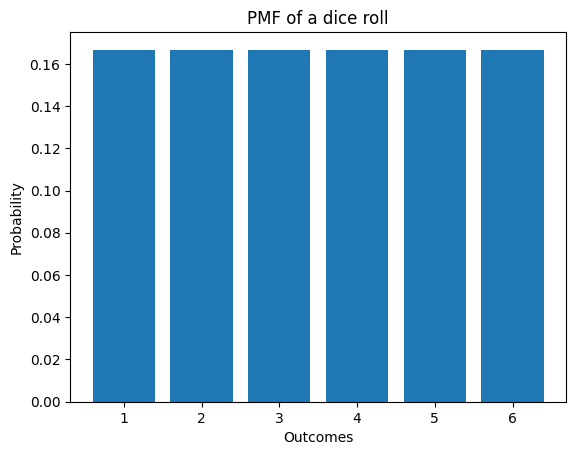

In [39]:
plt.bar(outcomes, probabilities)
plt.title("PMF of a dice roll")
plt.xlabel("Outcomes")
plt.ylabel("Probability")
plt.show()

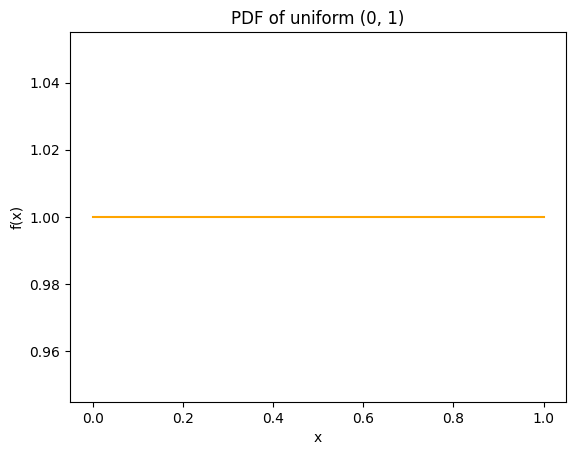

In [45]:
x = np.linspace(0, 1, 100)
pdf = stats.uniform.pdf(x, loc=0, scale=1)

plt.plot(x, pdf, color="orange")
plt.title("PDF of uniform (0, 1)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

## Conditional Probability
- The probability of an event A given that event B has ocurred

In [3]:
def bayes_theorem(prior, likelihood, evidence):
  return (likelihood * prior) / evidence

## Common Probability Distributions
- Gaussian Distributions (Normal)
- Bell-shaped curve with mean ($\mu$) and standart deviation($\sigma$)

$$
f(x) = \frac{1}{\sqrt{ 2\pi \sigma{^2}}}e{^-\frac{1(x-\mu){^2}}{2\sigma{^2}}}
$$

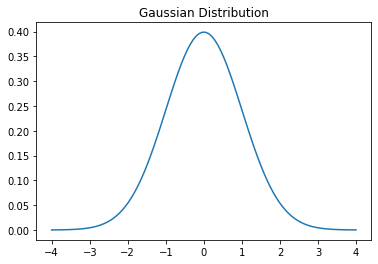

In [4]:
mu, sigma = 0, 1

x = np.linspace(-4, 4, 100)
y = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))

plt.plot(x, y)
plt.title("Gaussian Distribution")
plt.show()

## Bernoulli Distribution
- Describes outcomes of a binary experiment
$$P(X=1) = p, \space P(X = 0) = 1 - p$$

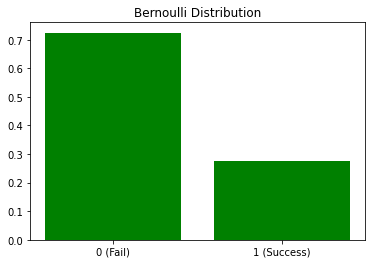

In [5]:
p = np.random.rand()
plt.bar([0, 1], [1 - p, p], color="green")
plt.title("Bernoulli Distribution")
plt.xticks([0, 1], labels=["0 (Fail)", "1 (Success)"])
plt.show()

## Bionomial Distribution
- Models the number of successes in $n$ independent Bernoulli trails
$$P(x = k) = \binom{n}{k}p{^k}(1 - p){^{n-k}}$$

In [6]:
from scipy.stats import binom

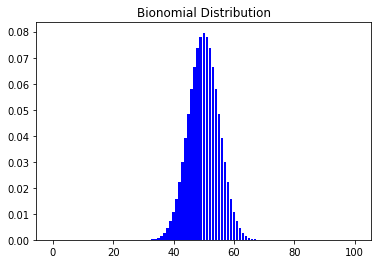

In [7]:
n = 100
p = 0.5
k = np.arange(0, n + 1)
y = binom.pmf(k, n, p)

plt.bar(k, y, color="blue")
plt.title("Bionomial Distribution")
plt.show()

## Poisson Distribution
- Models the number of events in a fixed interval of time or space
$$P(X = k) = \frac{\lambda_{k} e{^-\lambda}}{k!}$$

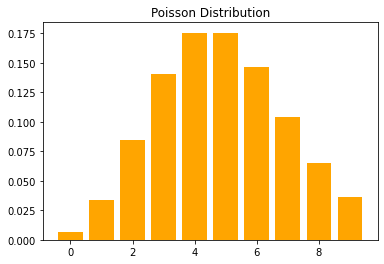

In [8]:
from scipy.stats import poisson

mu = 5
k = np.arange(0, 10)
y = poisson.pmf(k, mu)

plt.bar(k, y, color="orange")
plt.title("Poisson Distribution")
plt.show()

## Applications in ML
- Gaussian Distribution
  - Used in Gaussian Naive Bayes  and kernel density estimation
- Bernoulli Distribution
  - Model binary classification problems
- Binomial Distribution
  - Use in logistic regression to model binary outcomes
- Poisson Distribution
  - Models count data

# Statitics Fundamentals

## Measure of Central Tendency and Dispersion
- Central Tendency
  - Mean: The **average** value of dataset
  - Median: The **middle** value when data is sorted
  - Mode: The most **frequently** occurring value
- Dispersion
  - Variance: The average squared deviation from the mean
  - Standard Deviation: The square root of vairance, indicanting the spread of data

In [9]:
data = [35, 54, 43, 23, 54, 65, 23, 435, 65, 45, 543, 65, 34, 34, 523, 2, 11, 34]
sorted_data = sorted(data)


mean = sum(data) / len(data)
median = sorted_data[len(data) // 2] if len(data) % 2 != 0 else \
 (sorted_data[len(data) // 2 - 1] + sorted_data[len(data) // 2]) / 2
mode = max(set(data), key=data.count)

print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode)

Mean:  116.0
Median:  44.0
Mode:  65


In [10]:
variance = sum((x - mean) ** 2 for x in data) / len(data)
std_deviation = variance ** 0.5

print("Variance: ", variance)
print("Standard Deviation: ", std_deviation)

Variance:  30202.88888888889
Standard Deviation:  173.78978361482842


## Hypothesis Testing
1. Formule hypotheses
  - Null hypotheses ($h0$): Assume that there is no effect or difference in the population being studied.
  - Alternative hypotheses ($h1$): Assume that contradicts the null hypothesis and suggests that there is a statistically significant effect or relationship between variables in a study
2. Calculate test statitics: Measure the difference
3. Determine P-value
4. Interpret results

 ## Confidence Intervals and Statistical Significance
 - Confidence Interval: Range of values within witch the ture population parameter is expected to lie
 $$CI = \bar{x} \pm z^* \left( \frac{\sigma}{\sqrt{n}} \right)$$


In [11]:
sample_mean = mean
z_score = 1.8 # Condifidence Score

ci = (sample_mean - z_score * std_deviation / np.sqrt(len(data)),
      sample_mean + z_score * std_deviation / np.sqrt(len(data)))
print(ci)

(42.26723930300723, 189.73276069699278)
